### Notas de aula de Computação Quântica <br> Autor: Jonas Maziero

In [3]:
%run init.ipynb

# Transformada de Fourier quântica

A transformada de Fourier discreta clássica é um mapa entre o conjunto de $d$ números
$$x=(x_{0},\cdots,x_{d-1})$$
e o conjunto de $d$ números 
$$y=(y_{0},\cdots,y_{d-1})$$
com
\begin{equation}
y_{k} := \frac{1}{\sqrt{d}}\sum_{j=0}^{d-1}x_{j}e^{2\pi ijk/d}.
\end{equation}

No caso quântico, esses conjuntos de números são representados por estados quânticos. Mas precisamente, eles são os coeficientes de um vetor de estado quando representado na base computacional (de um qudit):
\begin{align}
|x\rangle & = \sum_{j=0}^{d-1}x_{j}|j\rangle = \begin{bmatrix} x_{0} \\ \vdots \\ x_{d-1} \end{bmatrix}, \\
|y\rangle & = \sum_{k=0}^{d-1}y_{k}|k\rangle = \begin{bmatrix} y_{0} \\ \vdots \\ y_{d-1} \end{bmatrix} \\
& \equiv \sum_{k=0}^{d-1}\frac{1}{\sqrt{d}}\sum_{j=0}^{d-1}x_{j}e^{2\pi ijk/d}|k\rangle = \sum_{j=0}^{d-1}x_{j}\Big(\frac{1}{\sqrt{d}}\sum_{k=0}^{d-1}e^{2\pi ijk/d}|k\rangle\Big).
\end{align}

Vemos que essa transformação,
\begin{align}
|y\rangle & =: U_{tfq}|x\rangle \\
& = U_{tfq}\sum_{j=0}^{d-1}x_{j}|j\rangle = \sum_{j=0}^{d-1}x_{j}U_{tfq}|j\rangle,
\end{align}
pode ser obtida se a ação dessa transformação na base computacional for
$$U_{tfq}|j\rangle = \frac{1}{\sqrt{d}}\sum_{k=0}^{d-1}e^{2\pi ijk/d}|k\rangle \text{, para }j=0,\cdots,d-1.$$
Isso pode ser obtido com
$$U_{tfq} = \frac{1}{\sqrt{d}}\sum_{k,l=0}^{d-1}e^{2\pi ikl/d}|k\rangle\langle l| \equiv F,$$
que coincide com a porta de Fourier, que discutimos anteriormente, quando estudamos qudits.

Vamos representar os vetores da base computacional de um qudit em termos da base computacional produto de
$$n=\log_{2}(d)\ \therefore\ d=2^{n}.$$
OBS. Se a dimensão $d$ não é uma potência de $2$, aumentamos o número de qubits até que $2^{n}> d$.

Ou seja, escreveremos
$$|j\rangle = |j_{1}\cdots j_{n}\rangle \equiv |j_{1}\rangle\otimes\cdots\otimes|j_{n}\rangle$$
com
$$j_{s}=0,1 \text{ para } s=1,\cdots,n$$
e
$$j = j_{1}2^{n-1}+j_{2}2^{n-2}+\cdots+j_{n-1}2^{1}+j_{n}2^{0} = \sum_{l=1}^{n}j_{l}2^{n-l}.$$
Para uso posterior, notemos que
$$\frac{j}{2^{n}} = j2^{-n} = \sum_{l=1}^{n}j_{l}2^{-l}.$$

Seguindo, vamos atuar o operador de um qudit representado por $\log_{2}(d)$ qubits:
\begin{align}
F|j\rangle & = F|j_{1}\cdots j_{n}\rangle = F(|j_{1}\rangle\otimes|j_{2}\rangle\otimes\cdots\otimes|j_{n-1}\rangle\otimes|j_{n}\rangle) \\
& = \frac{1}{\sqrt{d}}\sum_{k=0}^{d-1}e^{2\pi ijk/d}|k\rangle  = \frac{1}{\sqrt{2^{n}}}\sum_{k=0}^{2^{n}-1}e^{2\pi ijk/2^{n}}|k\rangle \\
& = \frac{1}{\sqrt{2^{n}}}\sum_{k_{1},k_{2},\cdots, k_{n-1},k_{n}=0}^{1}e^{2\pi ij\sum_{l=1}^{n}k_{l}2^{-l}}|k_{1}k_{2}\cdots k_{n-1}k_{n}\rangle  \\
& = \frac{1}{\sqrt{2^{n}}}\sum_{k_{1},k_{2},\cdots,k_{n-1},k_{n}=0}^{1}\Pi_{l=1}^{n}e^{2\pi ijk_{l}2^{-l}}|k_{1}k_{2}\cdots k_{n-1}k_{n}\rangle \\
& = \frac{1}{\sqrt{2^{n}}}\sum_{k_{1},k_{2},\cdots,k_{n-1},k_{n}=0}^{1}e^{2\pi ijk_{1}2^{-1}}e^{2\pi ijk_{2}2^{-2}}\cdots e^{2\pi ijk_{n}2^{-n+1}}e^{2\pi ijk_{n}2^{-n}}|k_{1}\rangle\otimes|k_{2}\rangle\otimes\cdots\otimes|k_{n-1}\rangle\otimes|k_{n}\rangle \\
& = \frac{1}{\sqrt{2^{n}}}\Big(\sum_{k_{1}=0}^{1}e^{2\pi ijk_{1}2^{-1}}|k_{1}\rangle\Big)\otimes\Big(\sum_{k_{2}=0}^{1}e^{2\pi ijk_{2}2^{-2}}|k_{2}\rangle\Big)\otimes\cdots \otimes\Big(\sum_{k_{n-1}=0}^{1}e^{2\pi ijk_{n}2^{-n+1}}|k_{n-1}\rangle\Big)\Big(\sum_{k_{n}=0}^{1}e^{2\pi ijk_{n}2^{-n}}|k_{n}\rangle\Big) \\
& = \frac{1}{\sqrt{2^{n}}}\Big(|0\rangle+e^{2\pi ij2^{-1}}|1\rangle\Big)\otimes\Big(|0\rangle+e^{2\pi ij2^{-2}}|1\rangle\Big)\otimes\cdots \otimes\Big(|0\rangle+e^{2\pi ij2^{-n+1}}|1\rangle\Big)\otimes\Big(|0\rangle+e^{2\pi ij2^{-n}}|1\rangle\Big). \hspace{1cm} (\star)
\end{align}

Ou seja, para implementar a TFQ, precisamos preparar $n$ qubits em um estado produto de estados que são uma superposição dos estados da base computacional com o estado $|1\rangle$  do qubit $p$ recebendo uma fase $e^{2\pi ij2^{-p}}$
com 
$$p=1,2,\cdots,n.$$
Podemos escrever essa fase como segue
\begin{align}
e^{2\pi ij2^{-p}} & = e^{2\pi i\sum_{l=1}^{n}j_{l}2^{n-l}2^{-p}} = e^{2\pi i\sum_{l=1}^{n}j_{l}2^{n-l-p}} = \Pi_{l=1}^{n}e^{2\pi ij_{l}2^{n-l-p}} \\
& = e^{2\pi ij_{1}2^{n-1-p}}e^{2\pi ij_{2}2^{n-2-p}}\cdots e^{2\pi ij_{n-1}2^{n-n+1-p}}e^{2\pi ij_{l}2^{n-n-p}} \\
& = e^{2\pi ij_{1}2^{n-1-p}}e^{2\pi ij_{2}2^{n-2-p}}\cdots e^{2\pi ij_{n-1}2^{1-p}}e^{2\pi ij_{n}2^{-p}}.
\end{align}
Alguns casos
\begin{align}
& e^{2\pi ij2^{-1}} = e^{2\pi ij_{1}2^{n-2}}e^{2\pi ij_{2}2^{n-3}}\cdots e^{2\pi ij_{n-1}2^{0}}e^{2\pi ij_{n}2^{-1}}, \\
& e^{2\pi ij2^{-2}} = e^{2\pi ij_{1}2^{n-3}}e^{2\pi ij_{2}2^{n-4}}\cdots e^{2\pi ij_{n-1}2^{-1}}e^{2\pi ij_{n}2^{-2}}, \\
& \vdots \\
& e^{2\pi ij2^{-n+1}} = e^{2\pi ij_{1}2^{0}}e^{2\pi ij_{2}2^{-1}}\cdots e^{2\pi ij_{n-1}2^{2-n}}e^{2\pi ij_{n}2^{-n+1}}, \\
& e^{2\pi ij2^{-n}} = e^{2\pi ij_{1}2^{-1}}e^{2\pi ij_{2}2^{-2}}\cdots e^{2\pi ij_{n-1}2^{1-n}}e^{2\pi ij_{n}2^{-n}}.
\end{align}

Lembrando, a ação da porta de Hadamard pode ser escrita de forma geral como
$$H|j_{l}\rangle = \frac{1}{\sqrt{2}}\big(|0\rangle+e^{2\pi ij_{l}/2}|1\rangle\big).$$
A porta de fase,
$$P(\phi) = |0\rangle\langle 0|+e^{i\phi}|1\rangle\langle 1|,$$
atua como segue
$$P(\phi)|0\rangle = |0\rangle \text{ e } P(\phi)|1\rangle = e^{i\phi}|1\rangle.$$
Olhando para a última igualdade para o estado $F|j\rangle$, vemos que a forma dos estado locais se parecem com aquelas que podemos obter aplicando uma porta de fase $P(\phi)$. No entanto, vemos também que essas fases, $e^{2\pi ij2^{-p}}$, dependem dos estados iniciais de todos os qubits. Isso nos indica que precisaremos aplicar portas de fases controladas
$$C_{P(\phi)}^{A\rightarrow B} = |0\rangle_{A}\langle 0|\otimes\mathbb{I}_{B} + |1\rangle_{A}\langle 1|\otimes P(\phi).$$
Ou seja, a porta de fase dá uma fase $e^{i\phi}$ ao target se o estado do controle for $|1\rangle$. Ou poderíamos dizer que essa porta adiciona uma fase 
$$e^{i\phi j_{p}}$$ 
ao estado $|1\rangle$ target, com $j_{p}=0,1$ dependendo do estado do qubit target $p$.

Vamos começar olhando para o estado do __1º qubit__, que é proporcional a $|0\rangle+e^{2\pi ij2^{-1}}|1\rangle.$ Essa exponencial é dada por
$$e^{2\pi ij2^{-1}} = e^{2\pi ij_{1}2^{n-2}}e^{2\pi ij_{2}2^{n-3}}\cdots e^{2\pi ij_{n-1}2^{0}}e^{2\pi ij_{n}2^{-1}} = e^{2\pi i\big(j_{1}2^{n-2}+j_{2}2^{n-3}\cdots+j_{n-1}2^{0}+j_{n}2^{-1}\big)}.$$
Pelo $j_{1}$, vamos começar aplicando a Hadamard no 1º qubit
$$(H_{1}|j_{1}\rangle)\otimes|j_{2}\cdots j_{n}\rangle = \frac{1}{\sqrt{2}}\Big(|0\rangle+e^{2\pi ij_{1}2^{-1}}|1\rangle\Big)\otimes|j_{2}\cdots j_{n}\rangle$$

Seguindo, aplicaremos a porta de fase controlada com o controle indo, individualmente, desde o qubit $l=2$ até o qubit $l=n$, adicionando uma fase
$$e^{2\pi ij_{l}2^{-l}}$$
ao estado $|1\rangle$ do target, o qubit 1 neste caso.

Para o qubit $2$ como controle teremos
$$C_{P(2\pi i2^{-2})}^{2\rightarrow 1}(H_{1}|j_{1}\rangle)\otimes|j_{2}\cdots j_{n}\rangle = \frac{1}{\sqrt{2}}\Big(|0\rangle+e^{2\pi i(j_{1}2^{-1}+j_{2}2^{-2})}|1\rangle\Big)\otimes|j_{2}\cdots j_{n}\rangle.$$
Como a ação para os outros qubits é similar, teremos
\begin{align}
\Pi_{q=2}^{n}C_{P(2\pi i2^{-q})}^{q\rightarrow 1}(H_{1}|j_{1}\rangle)\otimes|j_{2}\cdots j_{n}\rangle & = \frac{1}{\sqrt{2}}\Big(|0\rangle+e^{2\pi i(j_{1}2^{-1}+j_{2}2^{-2}+\cdots+j_{n}2^{-n})}|1\rangle\Big)\otimes|j_{2}\cdots j_{n}\rangle \\
&  = \frac{1}{\sqrt{2}}\Big(|0\rangle+e^{2\pi ij2^{-n}}|1\rangle\Big)\otimes|j_{2}\cdots j_{n}\rangle \\
& =: |\xi_{0}\rangle.
\end{align}
Note que este é o estado do qubit $n$ no estado $F|j\rangle$. Isso indica que depois de finalizar as operações, precisaremos fazer uma troca entre os estados dos qubits $1$ e $n$.

Seguindo, aplicamos uma Hadamard no __2º qubit__, obtendo
$$H_{2}|\xi_{0}\rangle = \frac{1}{\sqrt{2}}\Big(|0\rangle+e^{2\pi ij2^{-n}}|1\rangle\Big)\otimes\Big(|0\rangle+e^{2\pi ij_{2}2^{-1}}|1\rangle\Big)\otimes|j_{3}\cdots j_{n}\rangle.$$
Seguindo, aplica-se portas de fase controladas como segue
\begin{align}
& \Pi_{q=3}^{n-1}C_{P(2\pi i2^{-q+1})}^{q\rightarrow 2}\frac{1}{\sqrt{2}}\Big(|0\rangle+e^{2\pi ij2^{-n}}|1\rangle\Big)\otimes\big(H_{2}|j_{2}\rangle\big)\otimes|j_{3}\cdots j_{n}\rangle \\
& = \frac{1}{\sqrt{2}}\Big(|0\rangle+e^{2\pi ij2^{-n}}|1\rangle\Big)\otimes\Big(|0\rangle+e^{2\pi i(j_{2}2^{-1}+j_{3}2^{-2}+\cdots+j_{n}2^{-n+1})}|1\rangle\Big)\otimes|j_{3}\cdots j_{n}\rangle \\
& = \frac{1}{\sqrt{2}}\Big(|0\rangle+e^{2\pi ij2^{-n}}|1\rangle\Big)\otimes\Big(|0\rangle+e^{2\pi i(j_{1}2^{0}+j_{2}2^{-1}+j_{3}2^{-2}+\cdots+j_{n}2^{-n+1})}|1\rangle\Big)\otimes|j_{3}\cdots j_{n}\rangle \\
& = \frac{1}{\sqrt{2}}\Big(|0\rangle+e^{2\pi ij2^{-n}}|1\rangle\Big)\otimes\Big(|0\rangle+e^{2\pi ij2^{-n+1}}|1\rangle\Big)\otimes|j_{3}\cdots j_{n}\rangle \\
& =: |\xi_{1}\rangle,
\end{align}
em que usamos e
$$e^{2\pi ij_{1}2^{0}} = e^{2\pi ij_{1}} = \cos(j_{1}2\pi)+i\sin(j_{1}2\pi) = 1+i0=1$$
para $j_{1}=0,1$ e
\begin{align}
j2^{-n+1} & = \sum_{l=1}^{n}j_{l}2^{n-l}2^{-n+1} = \sum_{l=1}^{n}j_{l}2^{-l+1} \\
& = j_{1}2^{0} + j_{2}2^{-1} + j_{3}2^{-2}+\cdots+j_{n}2^{-n+1}.
\end{align}

Fazendo mais uma passo, aplicamos a Hadarmad no __3º qubit__ e as portas de fase controladas no qubit 3 com os qubits controle indo desde o 4º até o n-ésimo. Com isso, obteremos
\begin{align}
& \Pi_{q=4}^{n}C_{P(2\pi ij_{q}2^{-q+2})}^{q\rightarrow 3}\frac{1}{\sqrt{2}}\Big(|0\rangle+e^{2\pi ij2^{-n}}|1\rangle\Big)\otimes\Big(|0\rangle+e^{2\pi ij2^{-n+1}}|1\rangle\Big)\otimes\Big(H_{3}|j_{3}\rangle\Big)\otimes|j_{4}j_{5}\cdots j_{n}\rangle \\
& = \frac{1}{\sqrt{2}}\Big(|0\rangle+e^{2\pi ij2^{-n}}|1\rangle\Big)\otimes\Big(|0\rangle+e^{2\pi ij2^{-n+1}}|1\rangle\Big)\otimes\Big(|0\rangle+e^{2\pi i(j_{3}2^{-1}+j_{4}2^{-2}+\cdots+j_{n}2^{-n+2})}|1\rangle\Big)\otimes|j_{4}j_{5}\cdots j_{n}\rangle \\
& \equiv \frac{1}{\sqrt{2}}\Big(|0\rangle+e^{2\pi ij2^{-n}}|1\rangle\Big)\otimes\Big(|0\rangle+e^{2\pi ij2^{-n+1}}|1\rangle\Big)\otimes\Big(|0\rangle+e^{2\pi i(j_{1}2^{1}+j_{2}2^{0}+j_{3}2^{-1}+j_{4}2^{-2}+\cdots+j_{n}2^{-n+2})}|1\rangle\Big)\otimes|j_{4}j_{5}\cdots j_{n}\rangle \\
& = \frac{1}{\sqrt{2}}\Big(|0\rangle+e^{2\pi ij2^{-n}}|1\rangle\Big)\otimes\Big(|0\rangle+e^{2\pi ij2^{-n+1}}|1\rangle\Big)\otimes\Big(|0\rangle+e^{2\pi ij2^{-n+2}}|1\rangle\Big)\otimes|j_{4}j_{5}\cdots j_{n}\rangle,
\end{align}
em que usamos
\begin{align}
& e^{2\pi ij_{2}2^{0}} = e^{2\pi ij_{2}} = \cos(j_{2}2\pi)+i\sin(j_{2}2\pi) = 1, \\
& e^{2\pi ij_{1}2^{1}} = e^{4\pi ij_{1}} = \cos(j_{1}4\pi)+i\sin(j_{1}4\pi) = 1
\end{align}
para $j_{1},j_{2}=0,1$
\begin{align}
j2^{-n+2} & = \sum_{l=1}^{n}j_{l}2^{n-l}2^{-n+2} = \sum_{l=1}^{n}j_{l}2^{-l+2} \\
& = j_{1}2^{1} + j_{2}2^{0} + j_{3}2^{-1} + \cdots + j_{n-1}2^{-n+3} + j_{n}2^{-n+2}.
\end{align}

Bom, com isso podemos inferir que se continuarmos com esse processo, de aplicar a porta de Hadamard $H_{l}$ no qubit $l=4,\cdots,n$ seguida de uma fase controlada aplicada no qubit $l$ com o qubit $q=l+1,\cdots,n$ como controle, 
$$\Pi_{q=l+1}^{n}C_{P(2\pi i2^{-q+l-1})}^{q\rightarrow l},$$
obteremos o seguinte estado
$$ |\Xi\rangle = \frac{1}{\sqrt{2}}\Big(|0\rangle+e^{2\pi ij2^{-n}}|1\rangle\Big)\otimes\Big(|0\rangle+e^{2\pi ij2^{-n+1}}|1\rangle\Big)\otimes\Big(|0\rangle+e^{2\pi ij2^{-n+2}}|1\rangle\Big)\otimes\cdots\otimes\Big(|0\rangle+e^{2\pi ij2^{-2}}|1\rangle\Big)\otimes\Big(|0\rangle+e^{2\pi ij2^{-1}}|1\rangle\Big).$$
Observe que para o __qubit $n$__ só aplicamos a Hadamard, sem aplicação de fases controladas.

Vemos que este estado é equivalente ao estado da eq. ($\star$) se trocarmos os estados dos qubit 1 e $n$, $2$ e $n-1$, $3$ e $n-2$, $\cdots$. Assim, finalmente obtemos que
\begin{equation}
F|j\rangle = \Pi_{l=1}^{n/2}SWAP^{l\leftrightarrow n-l+1}|\Xi\rangle.
\end{equation}
Essa equação é válida se $n$ for par. Se $n$ for ímpar, devemos usar como limite superior do produtório: 
$$(n-1)/2.$$
Lembrando
\begin{align}
SWAP^{l\leftrightarrow n-l+1} & = CNOT^{l\rightarrow n-l+1}CNOT^{n-l+1\rightarrow l}CNOT^{l\rightarrow n-l+1} \\
& = CNOT^{n-l+1\rightarrow l}CNOT^{l\rightarrow n-l+1}CNOT^{n-l+1\rightarrow l}.
\end{align}
_OBS._ Essas SWAPs comutam, e a princípio poderiam ser aplicadas em paralelo. Mas, na prática isso não é bem assim pois não temos conectividade entre todos os qubits do chip, e isso implica em várias SWAPs intermedidárias de estado para então aplicar as CNOTs entre os qubits $l$ e $n-l+1$. 

O circuito quântico para implementação da TFQ está mostrado na figura abaixo
<img src='fig_tfq.png' width = '900'>

### Circuito quântico para a TFQ de $n$ qubits

In [4]:
from qiskit import *
nshots = 8192
IBMQ.load_account()
provider= qiskit.IBMQ.get_provider(hub='ibm-q-research-2',group='federal-uni-sant-1',project='main')
device = provider.get_backend('ibmq_bogota')
simulator = Aer.get_backend('qasm_simulator')
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.quantum_info import state_fidelity

In [14]:
def qc_qft(n):
    qr = QuantumRegister(n); qc = QuantumCircuit(qr, name = 'QFT')
    for l in range(0, n):
        qc.h(qr[l])
        if l < n-1:
            for q in range(l+1, n):
                lb = 2*math.pi*2**(-q+l-1)
                qc.cp(lb, qr[q], qr[l])
            #qc.barrier()
    #qc.barrier()
    if n%2 == 0:
        ul = n//2
    else:
        ul = (n-1)//2
    for p in range(0, ul):
        qc.swap(p, n-1-p)
    return qc

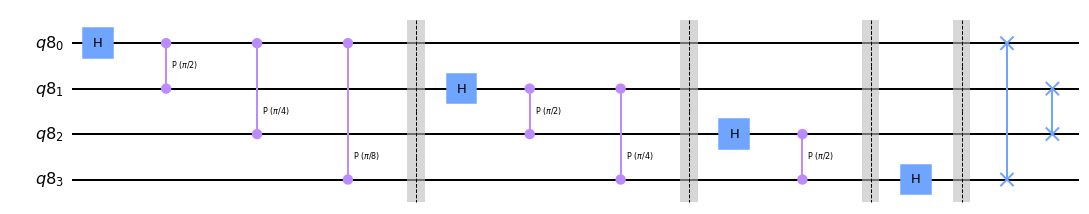

In [13]:
n = 4; qc_qft_ = qc_qft(n); qc_qft_.draw(output='mpl')

# TFQ inversa
Para obter o circuito quântico para a transformada de Fourier quântica inversa, notemos primeiramente que a inversa da porta de Hadamard é a própria:
$$H^{\dagger} = H.$$
Como a CNOT também é hermitiana, terremos também que
$$SWAP^{\dagger} = SWAP$$
pois $SWAP_{AB} = CNOT_{AB}CNOT_{BA}CNOT_{AB}$ e a $CNOT$ é hermitiana.

Já para a porta de fase temos que
$$P(\phi)^{\dagger} = P(-\phi).$$
Assim
$$C_{P(\phi)}^{\dagger} = C_{P(-\phi)}.$$

In [17]:
def qc_iqft(n):
    qr = QuantumRegister(n); qc = QuantumCircuit(qr, name = 'IQFT')
    if n%2 == 0:
        ul = n//2
    else:
        ul = (n-1)//2
    for p in range(ul-1, -1, -1):
        qc.swap(p, n-1-p)
    #qc.barrier()
    for l in range(n-1, -1, -1):
        if l < n-1:
            for q in range(n-1, l+1-1, -1):
                lb = -2*math.pi*2**(-q+l-1)#; print(lb)
                qc.cp(lb, qr[q], qr[l])
        qc.h(qr[l])
        #qc.barrier()
    return qc

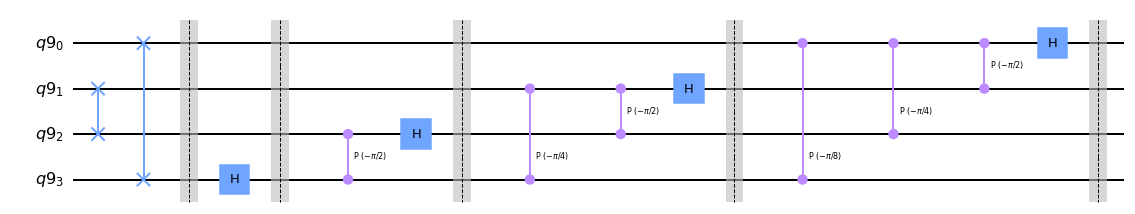

In [16]:
n = 4; qc_iqft_ = qc_iqft(n); qc_iqft_.draw(output='mpl')

## TFQ de 1 qubit
Para 1 qubit, a TFQ é simplementente a porta de Hadamard, a última linha do circuito da figura acima para a TFQ. Neste caso, se começamos com 
$$|x\rangle=x_{0}|0\rangle+x_{1}|1\rangle,$$
teremos
\begin{align}
|y\rangle & = F|x\rangle = H|x\rangle = x_{0}H|0\rangle+x_{1}H|1\rangle \\
& = x_{0}2^{-1/2}(|0\rangle+|1\rangle)+x_{1}2^{-1/2}(|0\rangle-|1\rangle) \\
& = 2^{-1/2}(x_{0}+x_{1})|0\rangle + 2^{-1/2}(x_{0}-x_{1})|1\rangle \\
& = y_{0}|0\rangle + y_{1}|1\rangle.
\end{align}

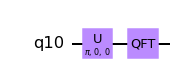

In [18]:
n = 1
qr = QuantumRegister(n); qc = QuantumCircuit(qr)
th = math.pi; ph = 0; lb = 0
qc.u(th, ph, lb, qr[0])
qc_qft_ = qc_qft(n); qft = qc_qft_.to_gate(); qc.append(qft, [0])
qc.draw(output='mpl')

In [24]:
svsimulator = Aer.get_backend('statevector_simulator')
job = execute(qc, backend = svsimulator, shots = 1, memory = True)
print(job.result().get_statevector(qc))

[ 0.70710678+0.00000000e+00j -0.70710678-8.65956056e-17j]
